# Quick Feature Analysis 

Goal: Understand the most important features that influence value_eur. 

In [46]:
# # Import necessary libraries #Make sure pandas is installed in environment
import pandas as pd

# Load the datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/submission.csv')

# Appy Cleaning before finding Correlation of features
 

In [27]:
# Columns to drop
columns_to_drop = [
    'player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 
    'nation_position', 'goal_keeping_speed']

# Numerical Columns to Fill with Median
numerical_cols = [
    'release_clause_eur', 'defending', 'dribbling', 'pace',
    'passing', 'physic', 'shooting', 'wage_eur']
# (Exclude club_jersey_number: not relevant)

# Categorical Columns to Fill with 'Unknown'
categorical_cols = [
    'club_name', 'club_position', 'league_name', 'club_contract_valid_until']# 1. DROP columns -> too many missing values + not critical for predicting market value
train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# Quick check : dropped columns
print("Dropped columns from train:", columns_to_drop)
print("Dropped columns from test:", columns_to_drop)

# 2. FILL numerical columns -> with median
for column in numerical_cols: 
    median_value = train[column].median()
    train[column] = train[column].fillna(median_value)
    test[column] = test[column].fillna(median_value)
# Quick check: filled numerical columns
print("Train numerical columns after filling:", train[numerical_cols].isnull().sum())
print("Test numerical columns after filling:", test[numerical_cols].isnull().sum())

# 3. FILL categorical columns -> with 'Unknown'
for column in categorical_cols:
    train[column] = train[column].fillna('Unknown')
    test[column] = test[column].fillna('Unknown')   
# Quick check: filled categorical columns
print("Train categorical columns after filling:", train[categorical_cols].isnull().sum())
print("Test categorical columns after filling:", test[categorical_cols].isnull().sum())

#4. FILL remaining missing values -> with 'Unknown'
train.fillna('Unknown', inplace=True)
test.fillna('Unknown', inplace=True)
# Last check: filled remaining missing values
print("Remaining missing values in train:", train.isnull().sum().sum())
print("Remaining missing values in test:", test.isnull().sum().sum())


Dropped columns from train: ['player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 'nation_position', 'goal_keeping_speed']
Dropped columns from test: ['player_traits', 'player_tags', 'club_loaned_from', 'nation_jersey_number', 'nation_position', 'goal_keeping_speed']
Train numerical columns after filling: release_clause_eur    0
defending             0
dribbling             0
pace                  0
passing               0
physic                0
shooting              0
wage_eur              0
dtype: int64
Test numerical columns after filling: release_clause_eur    0
defending             0
dribbling             0
pace                  0
passing               0
physic                0
shooting              0
wage_eur              0
dtype: int64
Train categorical columns after filling: club_name                    0
club_position                0
league_name                  0
club_contract_valid_until    0
dtype: int64
Test categorical columns after filling: club

C:\Users\Albin\AppData\Local\Temp\ipykernel_28200\411403165.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.fillna('Unknown', inplace=True)
C:\Users\Albin\AppData\Local\Temp\ipykernel_28200\411403165.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.fillna('Unknown', inplace=True)


# 1.1 ----1.2 Martyyy

# 1.3 Calculate correlation matrix with value_eur 

In [18]:
print(train.columns.tolist()) #Current Train features 

['Unnamed: 0', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_position', 'club_jersey_number', 'club_joined', 'nationality_id', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awa

Removing  that don't help predict value_eur — like names, IDs, etc.

| Column Name             | Why Remove?                                                     |
|--------------------------|------------------------------------------------------------------|
| player_id                | Just an ID (no meaning)                                          |
| short_name               | Name text (not useful)                                           |
| long_name                | Name text (not useful)                                           |
| player_face_url          | Image URL (useless for ML)                                       |
| club_logo_url            | Image URL                                                       |
| dob                      | Raw date of birth (could engineer age, but raw date is messy)    |
| nationality_name         | Not helpful directly for skill                                  |
| club_name                | Club name (changes value based on club prestige, but too noisy) |
| club_position            | (optional) depends on what you want                             |
| league_name              | League text (not skill itself)                                  |
| club_contract_valid_until| (optional) can keep or drop                                      |


In [34]:
# Remove unimportant identity columns before correlation
columns_to_remove = [
    'id', 'short_name', 'long_name', 'player_face_url', 
    'club_logo_url', 'dob', 'nationality_name', 
    'club_name', 'league_name', 'club_contract_valid_until'
]

# Drop from train_features
train= train.drop(columns=columns_to_remove, errors='ignore')

print("Remaining columns for correlation:", train.columns.tolist())


Remaining columns for correlation: ['Unnamed: 0', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_position', 'club_jersey_number', 'club_joined', 'nationality_id', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality

Correlation among features and features with Value_eur 

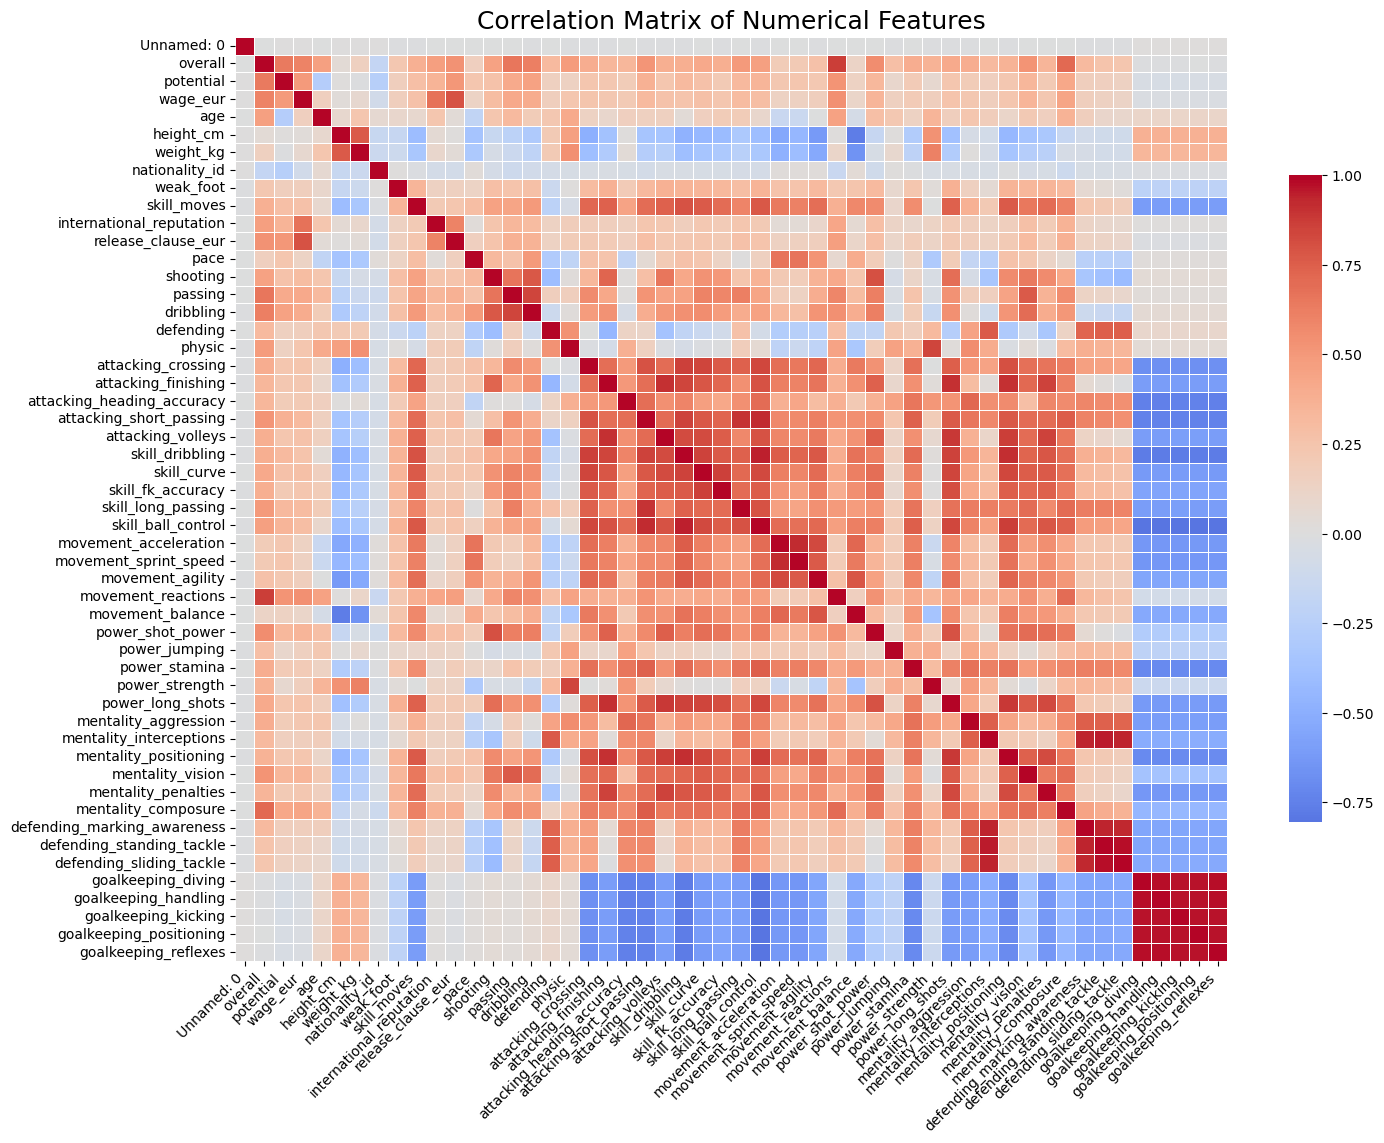

In [42]:
import pandas as pd
import seaborn as sns  #Make sure you have seaborn and Matplot package
import matplotlib.pyplot as plt

# 1. Select only numerical columns (exclude categorical ones)
train_numerical = train.select_dtypes(include=['number'])

# 2. Calculate the full correlation matrix
correlations = train_numerical.corr()

# 3. Visualize the full correlation matrix
# 3. Create a better styled heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, 
            cmap='coolwarm', 
            center=0, 
            annot=False, 
            fmt='.2f', 
            linewidths=0.5, 
            cbar_kws={'shrink': 0.7})
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## 1. 4 Top 10 Correlated Features with Value_eur 

In [48]:
#Find correlation of features with value_eur
#value_corr = correlations['value_eur']
value_corr = train_numerical.corrwith(train['value_eur']) #error with value_eur 

# Sort correlations (highest positive or negative)
value_corr_sorted = value_corr.sort_values(ascending=False)

print("Top 10 features correlated with value_eur:")
print(value_corr_sorted.head(10))

#select top 10
top10_features = value_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Create smaller correlation matrix
top10_corr_matrix = train_numerical[top10_features + ['value_eur']].corr()

# Plot heatmap of top 10 features
plt.figure(figsize=(10, 8))
sns.heatmap(top10_corr_matrix, 
            cmap='coolwarm', 
            center=0, 
            annot=True, 
            fmt='.2f', 
            linewidths=0.5, 
            cbar_kws={'shrink': 0.8})
plt.title('Top 10 Features Correlation with value_eur', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

ValueError: could not convert string to float: 'Unknown'

## 1.5  Small Analysis on Correlation

From the full correlation matrix, we selected the Top 10 features most correlated with the target variable `value_eur`.

These features are highly informative and should be prioritized in model training, as they have a strong direct relationship with the player's market value.

However, when analyzing the focused heatmap, we notice that some of these top features are also highly correlated with each other. 
This situation is called **multicollinearity**, and it can cause problems for linear models by making coefficient estimates unstable.

✅ For tree-based models (e.g., Random Forest, XGBoost), multicollinearity is less of a problem.

⚠️ If we use linear models (e.g., Linear Regression), we might need to:
- Remove one of two highly correlated features
- Apply regularization (like Lasso Regression)

In conclusion, the Top 10 correlated features are a strong base for building predictive models, but careful selection or model choice is needed to handle possible multicollinearity.

# 2. Prepare Final Dataset for Modeling 